In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

df = pd.read_csv('/home/jairo/results_CRAWDAD_full.csv')
# display(df)

Text(0,0.5,'Sobrecarga')

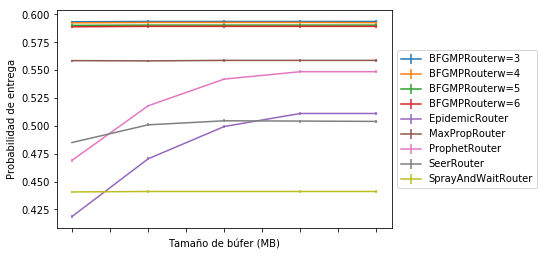

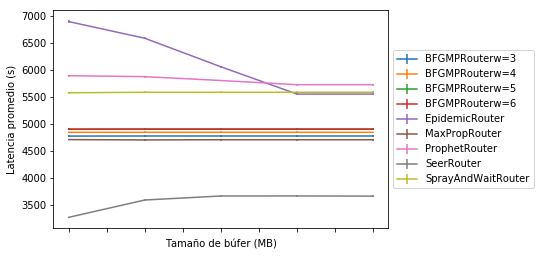

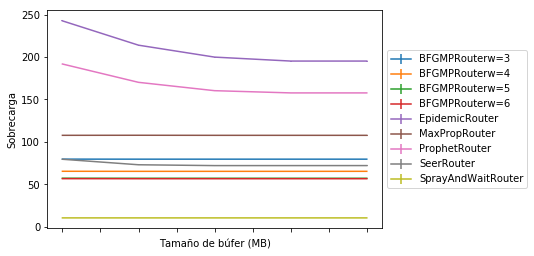

In [3]:
buffer_order = ['50M', '75M', '100M', '150M', '200M']

means = df[df.msg_interval=='25,35'].groupby(by=['buffer_size', 'router_fmt']).mean()
errors = df[df.msg_interval=='25,35'].groupby(by=['buffer_size', 'router_fmt']).sem()*1.96
means = means.unstack()
errors = errors.unstack()

ax = means.loc[buffer_order].plot(rot=90, y='delivery_prob', yerr=errors['delivery_prob'])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Tamaño de búfer (MB)')
ax.set_ylabel('Probabilidad de entrega')

ax = means.loc[buffer_order].plot(rot=90, y='latency_avg', yerr=errors['latency_avg'])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Tamaño de búfer (MB)')
ax.set_ylabel('Latencia promedio (s)')

ax = means.loc[buffer_order].plot(rot=90, y='overhead_ratio', yerr=errors['overhead_ratio'])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Tamaño de búfer (MB)')
ax.set_ylabel('Sobrecarga')


Text(0,0.5,'Sobrecarga')

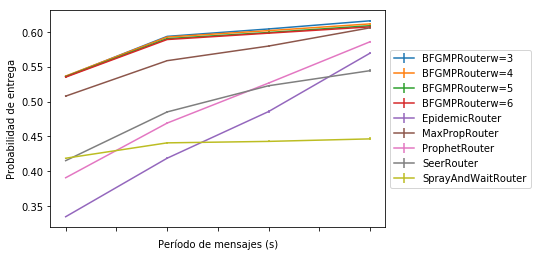

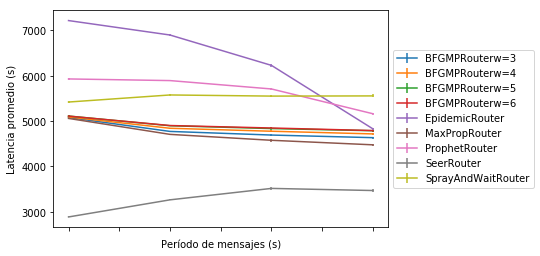

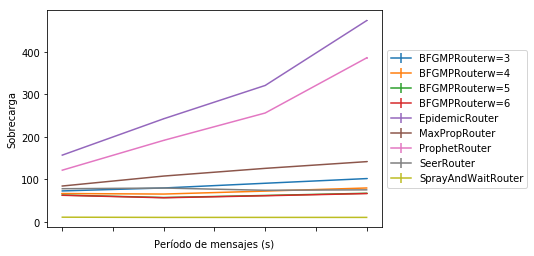

In [6]:
x_axis_order = ['5,25', '25,35', '35,60', '60, 120']
means = df[df.buffer_size=='50M'].groupby(by=['msg_interval', 'router_fmt']).mean()
errors = df[df.buffer_size=='50M'].groupby(by=['msg_interval', 'router_fmt']).sem()*1.96
means = means.unstack()
errors = errors.unstack()

ax = means.loc[x_axis_order].plot(rot=90, y='delivery_prob', yerr=errors['delivery_prob'])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Período de mensajes (s)')
ax.set_ylabel('Probabilidad de entrega')

ax = means.loc[x_axis_order].plot(rot=90, y='latency_avg', yerr=errors['latency_avg'])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Período de mensajes (s)')
ax.set_ylabel('Latencia promedio (s)')

ax = means.loc[x_axis_order].plot(rot=90, y='overhead_ratio', yerr=errors['overhead_ratio'])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Período de mensajes (s)')
ax.set_ylabel('Sobrecarga')

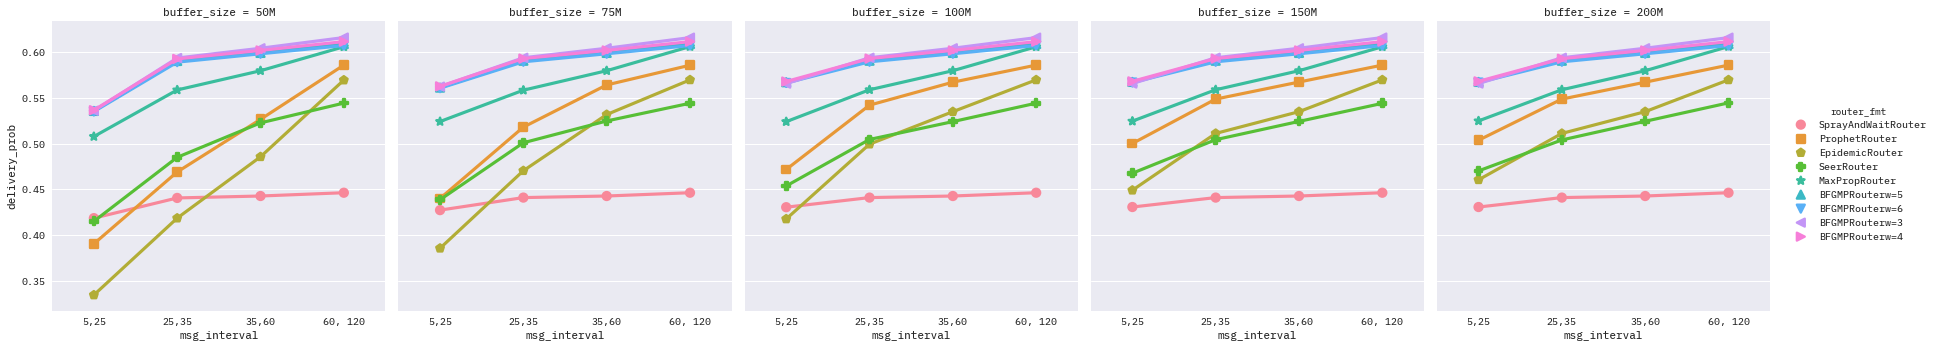

In [4]:
x_axis_order = ['5,25', '25,35', '35,60', '60, 120']
sns.set(style='darkgrid', font='IBM Plex Mono')
sns.factorplot(x='msg_interval', y='delivery_prob', hue='router_fmt', data=df, col='buffer_size', order=x_axis_order, col_order=['50M', '75M', '100M', '150M', '200M'], markers=['o','s', 'p', 'P', '*', '^', 'v', '<', '>'], size=5)

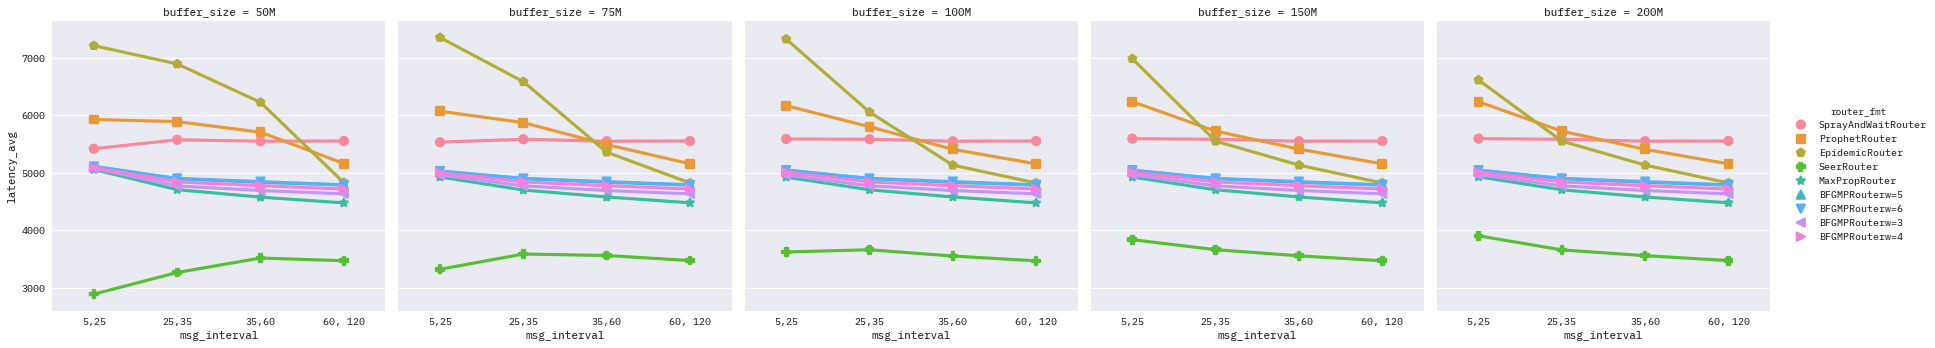

In [5]:
sns.factorplot(x='msg_interval', y='latency_avg', hue='router_fmt', data=df, col='buffer_size', order=x_axis_order, col_order=['50M', '75M', '100M', '150M', '200M'], markers=['o','s', 'p', 'P', '*', '^', 'v', '<', '>'], size=5)

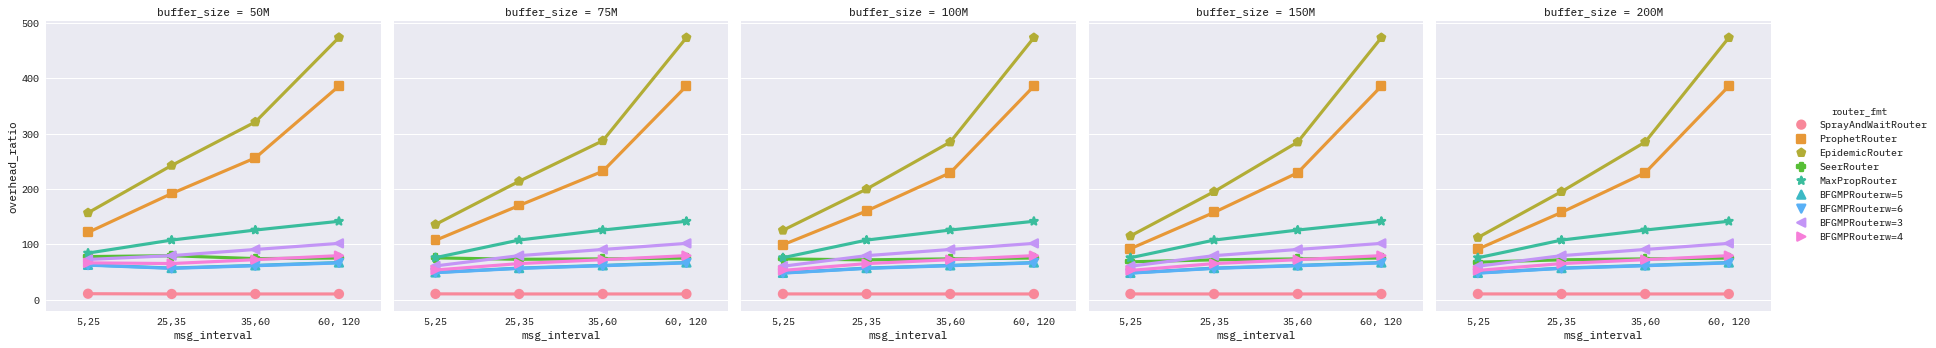

In [6]:
sns.factorplot(x='msg_interval', y='overhead_ratio', hue='router_fmt', data=df, col='buffer_size', order=x_axis_order, col_order=['50M', '75M', '100M', '150M', '200M'], markers=['o','s', 'p', 'P', '*', '^', 'v', '<', '>'], size=5)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_pdf.py:1201: UserWarning: 'IBM_Plex_Mono_Medium.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


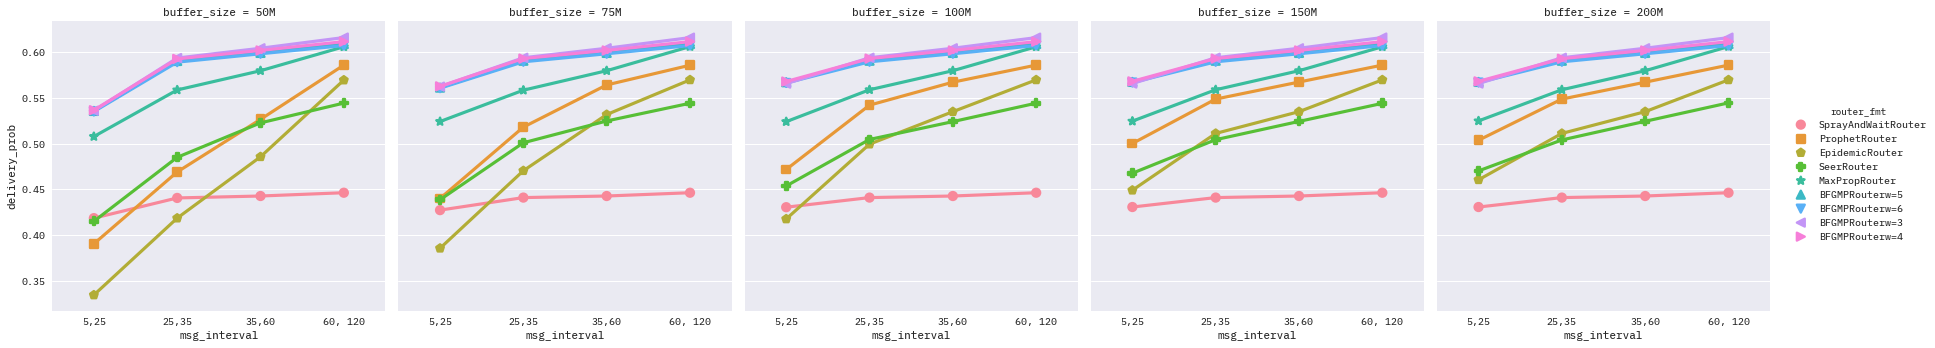

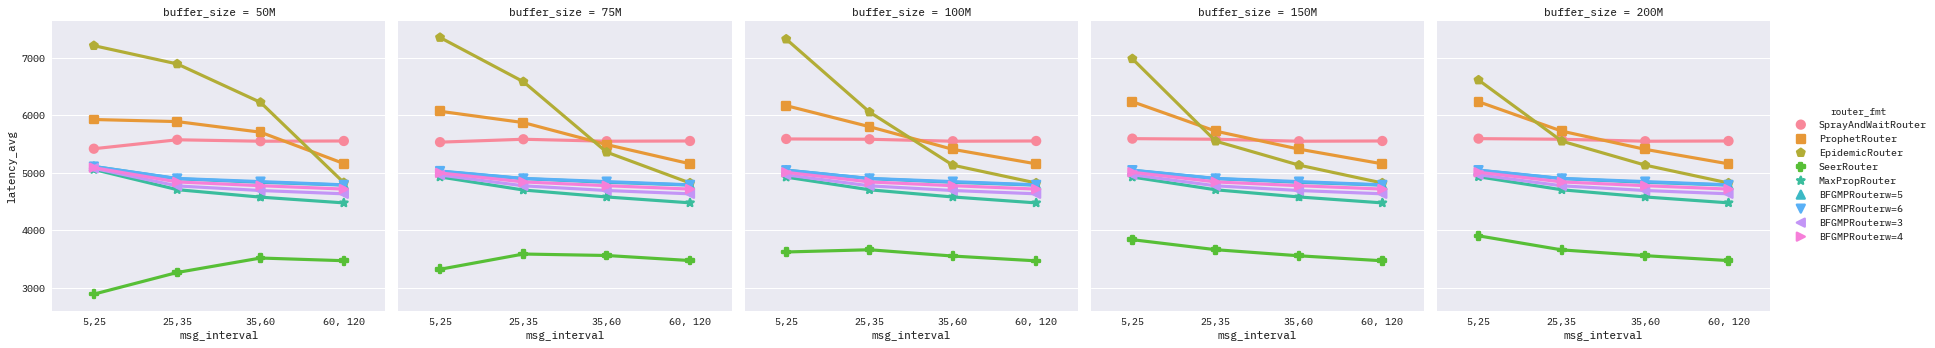

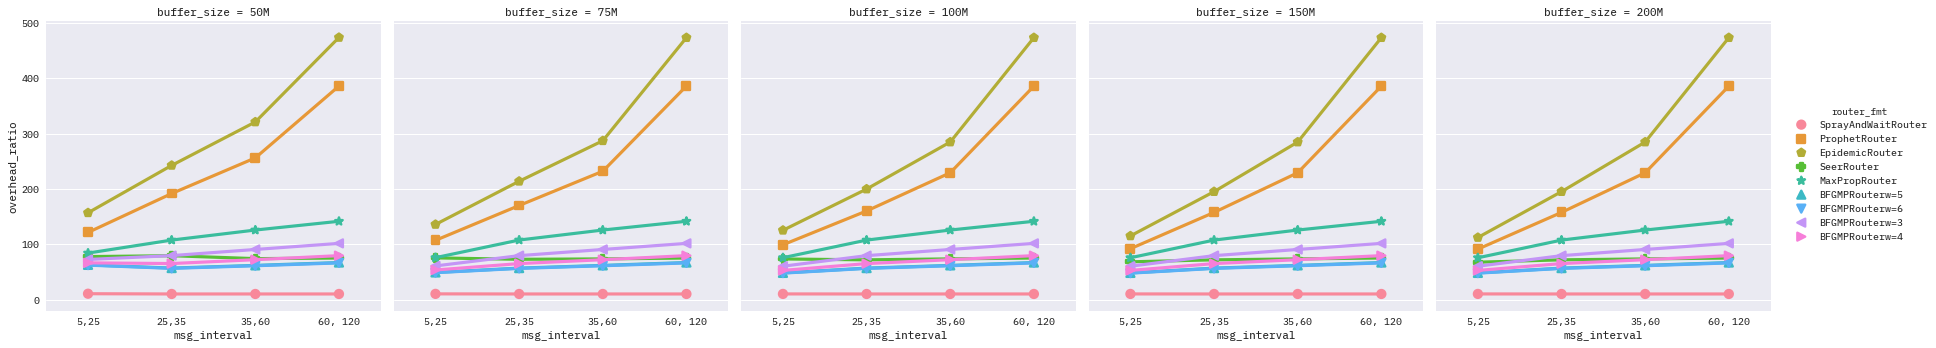

In [9]:
x_axis_order = ['5,25', '25,35', '35,60', '60, 120']
sns.set(style='darkgrid', font='IBM Plex Mono')
markers = ['o','s', 'p', 'P', '*', '^', 'v', '<', '>']
column_order = ['50M', '75M', '100M', '150M', '200M']

with PdfPages('/home/jairo/buffer-traffic_infocomm.pdf') as pdf:
    sns.factorplot(x='msg_interval', y='delivery_prob', hue='router_fmt', data=df, col='buffer_size', order=x_axis_order, col_order=column_order, markers=markers, size=5)
    pdf.savefig()
    sns.factorplot(x='msg_interval', y='latency_avg', hue='router_fmt', data=df, col='buffer_size', order=x_axis_order, col_order=column_order, markers=markers, size=5)
    pdf.savefig()
    sns.factorplot(x='msg_interval', y='overhead_ratio', hue='router_fmt', data=df, col='buffer_size', order=x_axis_order, col_order=column_order, markers=markers, size=5)
    pdf.savefig()